# CZ3005 Project 1 - Balancing a Pole on a Cart

### Done by: Zon Liew (U1921098F), Charlotte Teo (U2022021G), Paul Low (U2022421F)

Objectives:
Apply Linear annealed policy with the EpsGreedyQPolicy as the inner policy:
Achieve a DQN model that trains in the least possible number of episodes.
Balance pole on the cart for 500 steps for 100 consecutive episodes while testing.

Epsilon-Greedy chooses the optimal action at each step, but sometimes randomly chooses an unlikely option.
We specify an initially high exploration rate (epsilon) of 1 at the beginning of Q function training because we know nothing about the importance of the Q table. Epsilon value is decreased as the agent has more confidence in the Q values.

A DQN agent can be used in any environment which has a discrete action space.
It is based on the Q - Network, a neural network model that can learn to predict Q-Values (expected returns) for all actions, given an observation from the environment.

The hyperparameters are:

Size of 1st fully connected layer: 256
Size of 2nd fully connected layer: 512
Period of the update of the target network parameters: 1000 steps
Discount factor: 0.99
Decay factor for epsilon in epsilon-greedy policy: 0.99
Minimum epsilon in epsilon-greeddy policy: 1E-4
Learning rate: 3E-4
Size of replay memory: 1000000
Period of experience replay: 4 steps
PER alpha: 0.2
PER beta0: 0.4


## Task 1

In [ ]:
#Install keras rl2 which seamlessly integrates with the  OpenAI Gym  to evaluate and play around with DQN Algorithm
!pip install keras-rl2
!pip install dopamine-rl
#Install Open AI Gym for the Cart Pole Environment
!pip install gym

!pip install tensorflow --upgrade
!pip install rl-agents==0.1.1

In [1]:
import gym
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Input, Flatten, Dense
import numpy as np
import rl
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

from tensorflow.keras.optimizers import Adam



In [2]:
#Load the CartPole environment from the OpenAI Gym suite
env = gym.make("CartPole-v1")

In [3]:
initial_observation = env.reset()
print("Initial observation:", initial_observation)
cumulative_reward = 0
done = False

Initial observation: [-0.024546    0.028255   -0.03943262 -0.00854617]


In [4]:
#Building DQN Agent with Keras-RL
# setup experience replay buffer
memory = SequentialMemory(limit=50000, window_length=1)

# setup the Linear annealed policy with the EpsGreedyQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=  EpsGreedyQPolicy(),   # policy used to select actions
                               attr='eps',                          # attribute in the inner policy to vary             
                               value_max=1.0,                       # maximum value of attribute that is varying
                               value_min=0.1,                       # minimum value of attribute that is varying
                               value_test=0.05,                     # test if the value selected is < 0.05
                               nb_steps=10000)                      # the number of steps between value_max and value_min

#Feed-Forward Neural Network Model for Deep Q Learning (DQN)
model = Sequential()
#print(env.observation_space)
#Input is 1 observation vector, and the number of observations in that vector 
model.add(Input(shape=(1,env.observation_space.shape[0])))
model.add(Flatten())
#Hidden layers with 24 nodes each
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#Output is the number of actions in the action space
model.add(Dense(env.action_space.n, activation='linear')) 


#Feed-Forward Neural Network Architecture Summary
print(model.summary())

#Defining DQN Agent for DQN Model
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=25,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy,                   # the action selection policy
              enable_dueling_network=True)                   

# Configure and compile agent. 
#Use built-in tensorflow.keras Adam optimizer and evaluation metrics            
#Adam._name = 'Adam'
dqn.compile(keras.optimizers.Adam(learning_rate=2.5e-4,epsilon = 0.01), metrics = ["mse",'accuracy'])



     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 34,434
Trainable params: 34,434
Non-trainable params: 0
_________________________________________________________________
None
Metal device set to: Apple M2
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. ht

2023-03-05 12:29:04.556395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-05 12:29:04.556420: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-05 12:29:04.561171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-03-05 12:29:04.562759: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-05 12:29:04.563181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 12:29:04.572637: W tensorflow/c/c_api.cc:291] Operation '{name:'dens

In [5]:
#Finally fit and train the agent
history = dqn.fit(env, nb_steps=5000, visualize=False, verbose=10)
#dqn.save_weights('dqn_weights.h5f', overwrite=True)
#dqn.load_weights('dqn_weights.h5f')

Training for 5000 steps ...
    9/5000: episode: 1, duration: 0.177s, episode steps:   9, steps per second:  51, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: --, mse: --, accuracy: --, mean_q: --, mean_eps: --


/Applications/miniconda3/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-05 12:29:08.088827: W tensorflow/c/c_api.cc:291] Operation '{name:'lambda/sub' id:116 op device:{requested: '', assigned: ''} def:{{{node lambda/sub}} = Sub[T=DT_FLOAT, _has_manual_control_dependencies=true](lambda/add, lambda/Mean)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-03-05 12:29:08.096543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 12:29:08.105102: W tensorflow/c/c_api.cc:291] Operation '{name:'count_1/Assign' id:354 op device:{

   23/5000: episode: 2, duration: 0.030s, episode steps:  14, steps per second: 471, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: --, mse: --, accuracy: --, mean_q: --, mean_eps: --


/Applications/miniconda3/lib/python3.10/site-packages/keras_rl2-1.0.5-py3.10.egg/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/Applications/miniconda3/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-05 12:29:08.293248: W tensorflow/c/c_api.cc:291] Operation '{name:'lambda_1/sub' id:208 op device:{requested: '', assigned: ''} def:{{{node lambda_1/sub}} = Sub[T=DT_FLOAT, _has_manual_control_dependencies=true](lambda_1/add, lambda_1/Mean)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trig

   65/5000: episode: 3, duration: 1.210s, episode steps:  42, steps per second:  35, episode reward: 42.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.476 [0.000, 1.000],  loss: 0.495919, mse: 0.507855, accuracy: 0.431891, mean_q: 0.130067, mean_eps: 0.995950
   79/5000: episode: 4, duration: 0.241s, episode steps:  14, steps per second:  58, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.643 [0.000, 1.000],  loss: 0.401616, mse: 0.429986, accuracy: 0.444196, mean_q: 0.204391, mean_eps: 0.993565
  104/5000: episode: 5, duration: 0.413s, episode steps:  25, steps per second:  61, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 0.378018, mse: 0.427811, accuracy: 0.451250, mean_q: 0.271155, mean_eps: 0.991810
  126/5000: episode: 6, duration: 0.365s, episode steps:  22, steps per second:  60, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss

  772/5000: episode: 34, duration: 0.289s, episode steps:  18, steps per second:  62, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: 0.468803, mse: 12.419927, accuracy: 0.472222, mean_q: 4.946034, mean_eps: 0.931375
  802/5000: episode: 35, duration: 0.480s, episode steps:  30, steps per second:  63, episode reward: 30.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.567 [0.000, 1.000],  loss: 0.376494, mse: 13.334414, accuracy: 0.507292, mean_q: 5.154551, mean_eps: 0.929215
  829/5000: episode: 36, duration: 0.429s, episode steps:  27, steps per second:  63, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.519 [0.000, 1.000],  loss: 0.452360, mse: 13.911018, accuracy: 0.467593, mean_q: 5.232128, mean_eps: 0.926650
  859/5000: episode: 37, duration: 0.474s, episode steps:  30, steps per second:  63, episode reward: 30.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000]

 1622/5000: episode: 64, duration: 0.615s, episode steps:  39, steps per second:  63, episode reward: 39.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.462 [0.000, 1.000],  loss: 1.296874, mse: 60.701327, accuracy: 0.538462, mean_q: 11.190634, mean_eps: 0.855820
 1635/5000: episode: 65, duration: 0.224s, episode steps:  13, steps per second:  58, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.692 [0.000, 1.000],  loss: 1.126056, mse: 61.209392, accuracy: 0.521635, mean_q: 11.258954, mean_eps: 0.853480
 1663/5000: episode: 66, duration: 0.447s, episode steps:  28, steps per second:  63, episode reward: 28.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 1.517186, mse: 63.504407, accuracy: 0.547991, mean_q: 11.429962, mean_eps: 0.851635
 1706/5000: episode: 67, duration: 0.675s, episode steps:  43, steps per second:  64, episode reward: 43.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.535 [0.000, 1.0

 2743/5000: episode: 94, duration: 0.282s, episode steps:  17, steps per second:  60, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.353 [0.000, 1.000],  loss: 3.092832, mse: 183.642148, accuracy: 0.500000, mean_q: 19.434097, mean_eps: 0.753940
 2759/5000: episode: 95, duration: 0.263s, episode steps:  16, steps per second:  61, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.688 [0.000, 1.000],  loss: 2.252308, mse: 179.932795, accuracy: 0.544922, mean_q: 19.348245, mean_eps: 0.752455
 2844/5000: episode: 96, duration: 1.372s, episode steps:  85, steps per second:  62, episode reward: 85.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.482 [0.000, 1.000],  loss: 2.370733, mse: 192.668773, accuracy: 0.548162, mean_q: 19.989492, mean_eps: 0.747910
 2897/5000: episode: 97, duration: 0.867s, episode steps:  53, steps per second:  61, episode reward: 53.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.528 [0.000, 

 4997/5000: episode: 124, duration: 2.429s, episode steps: 157, steps per second:  65, episode reward: 157.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.503 [0.000, 1.000],  loss: 3.193938, mse: 644.580744, accuracy: 0.586584, mean_q: 36.662555, mean_eps: 0.557380
done, took 80.529 seconds


In [6]:
"""
action = 0
observation, reward, done, info = env.step(action)
print("Observations after action: ", observation)
print("Reward for this step: ", reward)
print("Episode Completion: ", done)


"""


'\naction = 0\nobservation, reward, done, info = env.step(action)\nprint("Observations after action: ", observation)\nprint("Reward for this step: ", reward)\nprint("Episode Completion: ", done)\n\n\n'

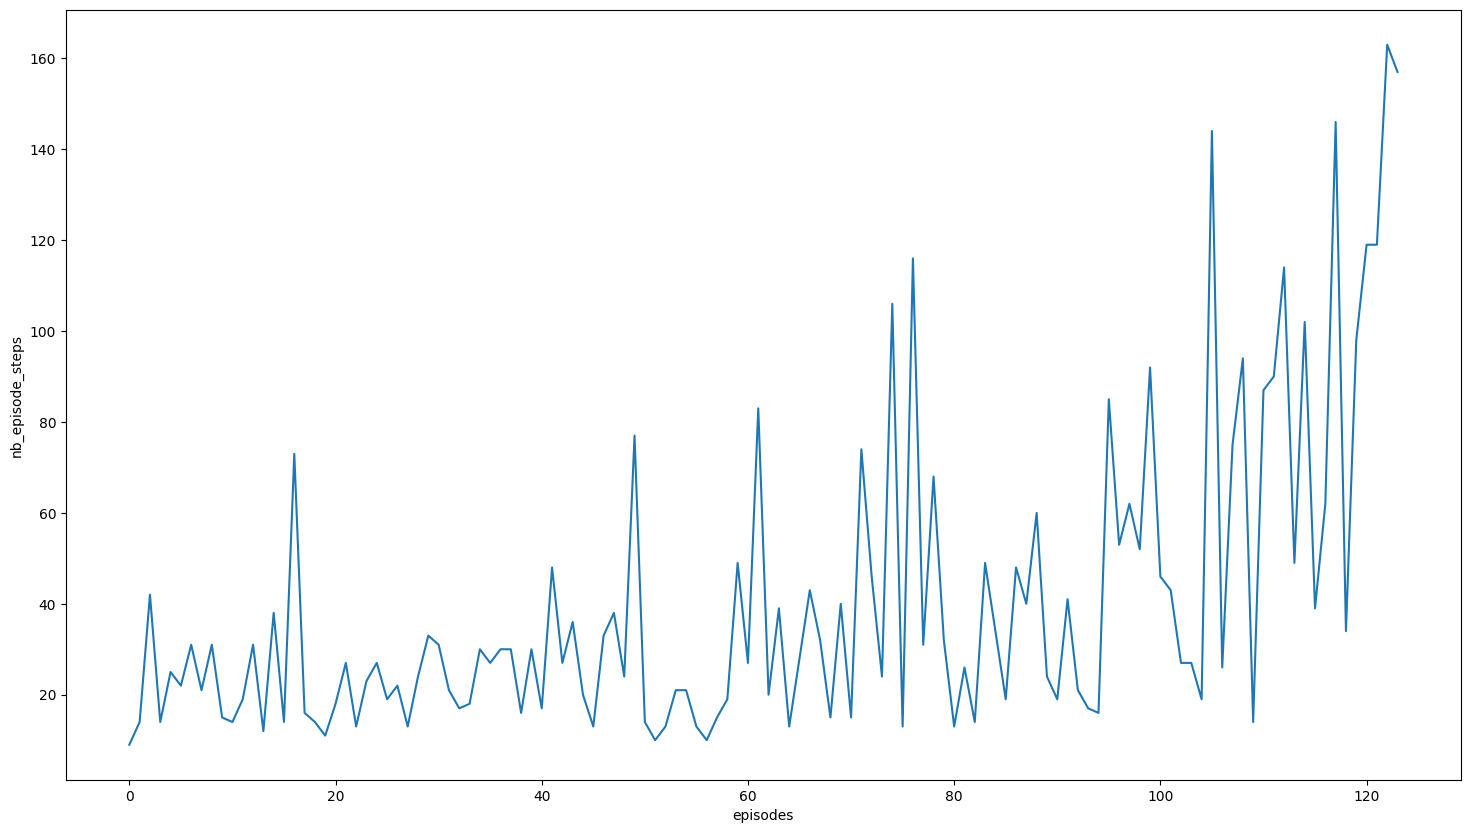

In [7]:
# Visualize the history for number of Training episode steps of the Cart Pole Game
plt.figure(figsize = (18,10))
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()


In [8]:
# Finally, evaluate and test our algorithm for 100 episodes.
dqn.test(env, nb_episodes=100, visualize=False)

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 309.000, steps: 309
Episode 5: reward: 356.000, steps: 356
Episode 6: reward: 278.000, steps: 278
Episode 7: reward: 284.000, steps: 284
Episode 8: reward: 192.000, steps: 192
Episode 9: reward: 257.000, steps: 257
Episode 10: reward: 267.000, steps: 267
Episode 11: reward: 216.000, steps: 216
Episode 12: reward: 242.000, steps: 242
Episode 13: reward: 500.000, steps: 500
Episode 14: reward: 290.000, steps: 290
Episode 15: reward: 500.000, steps: 500
Episode 16: reward: 282.000, steps: 282
Episode 17: reward: 365.000, steps: 365
Episode 18: reward: 215.000, steps: 215
Episode 19: reward: 291.000, steps: 291
Episode 20: reward: 383.000, steps: 383
Episode 21: reward: 370.000, steps: 370
Episode 22: reward: 256.000, steps: 256
Episode 23: reward: 260.000, steps: 260
Episode 24: reward: 372.000, steps: 372
Episode 25: reward: 

In [9]:
# After training is done, we save the final weights.
dqn.save_weights('dqn_weights.h5f', overwrite=False)

[WARNING] dqn_weights.h5f.index already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!


2023-03-05 12:31:22.914862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-05 12:31:22.914904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-05 12:31:22.942909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [10]:
observation = env.reset()
dqn.load_weights('dqn_weights.h5f')
action = dqn.forward(observation)

print("Observation: ", observation)
print("Chosen action: ", action)

new_observation, reward, done, info = env.step(action)
print("Observations after action: ", new_observation)
print("Reward for this step: ", reward)
print("Episode Completion: ", done)

Observation:  [-0.03596123  0.0128352   0.04575599 -0.02172864]
Chosen action:  1
Observations after action:  [-0.03570452  0.20727211  0.04532142 -0.29963119]
Reward for this step:  1.0
Episode Completion:  False


2023-03-05 12:31:22.982038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## Task 2

Each Episode comprises of multiple steps. The environment is reset at the start of each episode as required. Next, the Agent makes the forward step based on the observation, before updating the new episode reward and observation for the next step. This continues until the termination criteria or truncation value of 500. Each cumulative reward is stored in a list and mapped out in the graph.

In [11]:
num_episodes = 100
episode_results = []
dqn.load_weights('dqn_weights.h5f')
for i in range(1,num_episodes+1):
    # Reset environment at the beginning of each episode
    observation = env.reset()
    cumulative_reward = 0
    done = False

    while not done:
        # Agent takes action based on observation
        action = dqn.forward(observation)
        
        # Environment processes action and returns new observation, reward, and done flag
        new_observation, reward, done, info = env.step(action)

        # Update episode reward and observation for next step
        observation = new_observation
        cumulative_reward += reward
        
    print("Episode:", i, " Cumulative reward: ", cumulative_reward)
    episode_results.append(cumulative_reward)

Episode: 1  Cumulative reward:  311.0
Episode: 2  Cumulative reward:  420.0
Episode: 3  Cumulative reward:  230.0
Episode: 4  Cumulative reward:  298.0
Episode: 5  Cumulative reward:  500.0
Episode: 6  Cumulative reward:  222.0
Episode: 7  Cumulative reward:  308.0
Episode: 8  Cumulative reward:  286.0
Episode: 9  Cumulative reward:  349.0
Episode: 10  Cumulative reward:  213.0
Episode: 11  Cumulative reward:  259.0
Episode: 12  Cumulative reward:  231.0
Episode: 13  Cumulative reward:  205.0
Episode: 14  Cumulative reward:  257.0
Episode: 15  Cumulative reward:  224.0
Episode: 16  Cumulative reward:  211.0
Episode: 17  Cumulative reward:  299.0
Episode: 18  Cumulative reward:  288.0
Episode: 19  Cumulative reward:  262.0
Episode: 20  Cumulative reward:  351.0
Episode: 21  Cumulative reward:  204.0
Episode: 22  Cumulative reward:  284.0
Episode: 23  Cumulative reward:  500.0
Episode: 24  Cumulative reward:  295.0
Episode: 25  Cumulative reward:  291.0
Episode: 26  Cumulative reward:  5

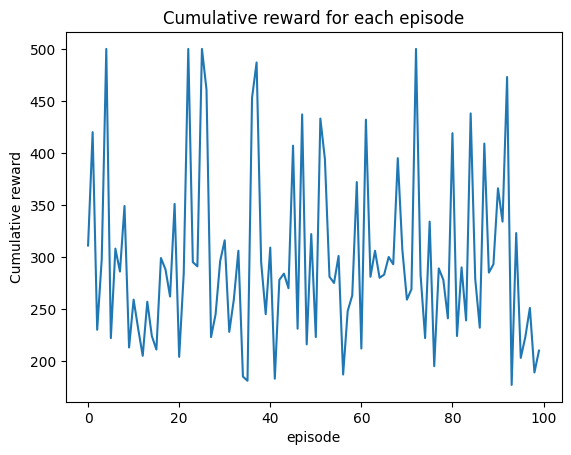

In [12]:
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

In [13]:
mean = sum(episode_results) / len(episode_results)
print("Average cumulative reward:", mean)
print("Is my agent good enough?", mean > 195)

Average cumulative reward: 297.08
Is my agent good enough? True


## Task 3